https://stackoverflow.com/questions/5484922/secondary-axis-with-twinx-how-to-add-to-legend

In [1]:
import seaborn as sns
import torch
import matplotlib.pyplot as plt
import pandas as pd
import time

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
perf_dict = {
    'train':list(range(1,11))
    ,'test':[0.1*x for x in range(11,1,-1)]
    ,'epoch':list(range(1,11))
}

In [4]:
df = pd.DataFrame.from_records(perf_dict)
df.index = df.epoch

In [5]:
import pickle
with open('perf_dict.pkl', 'rb') as handle:
    perf_dict = pickle.load(handle)
    
for epoch in perf_dict['loss']['train']:
    perf_dict['loss']['train'][epoch] = sum(perf_dict['loss']['train'][epoch]) / len(perf_dict['loss']['train'][epoch])
perf_dict['loss']['train'] = list(perf_dict['loss']['train'].values())

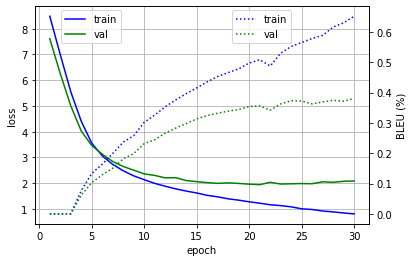

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('mathtext', default='regular')

e_max = 30
epochs = range(1,len(perf_dict['loss']['train'])+1)
epochs = epochs[:e_max]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(epochs, perf_dict['loss']['train'][:e_max], '-b', label = 'train')
ax.plot(epochs, perf_dict['loss']['val'][:e_max], '-g', label = 'val')
ax.tick_params(axis='x')#, colors="white")
ax.tick_params(axis='y')#, colors="white")

ax2 = ax.twinx()
ax2.plot(epochs, perf_dict['bleu']['train'][:e_max], ':b', label = 'train')
ax2.plot(epochs, perf_dict['bleu']['val'][:e_max], ':g', label = 'val')
ax.legend(loc=(0.08,0.83))
ax.grid()
ax.set_xlabel("epoch")#, color="white")
ax.set_ylabel(r"loss")#, color="white")
ax2.set_ylabel(r"BLEU (%)")#, color="white")
ax2.tick_params(axis='y')#, colors="white")
#ax2.set_ylim(0, 1)
#ax.set_ylim(0,10)
ax2.legend(loc=(0.59,0.83))
plt.show()

In [61]:
max(perf_dict['bleu']['val'])

0.3806574608400594

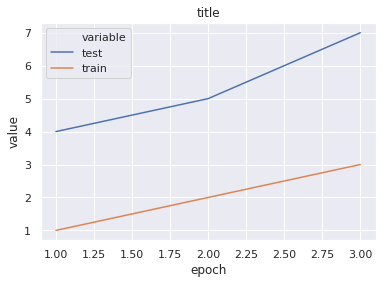

In [10]:
    sns.set(style="darkgrid")
    title = 'title'
    sns.lineplot(x='epoch', y='value', hue='variable', 
                 data=pd.melt(df, ['epoch']))
    if title:
        plt.title(title)

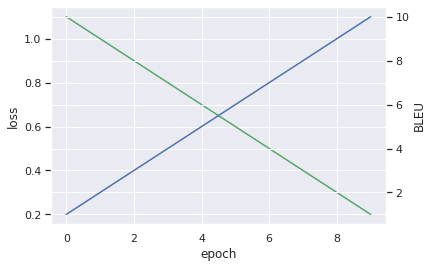

In [49]:
sns.set(style="darkgrid")
title = None#title'

plt.ylabel('loss')
plt.xlabel('epoch')

sns.lineplot(data=df.test, color="g")
ax2 = plt.twinx()
ax2.set_ylabel('BLEU')

sns.lineplot(data=df.train, color="b", ax=ax2)

if title:
    plt.title(title)